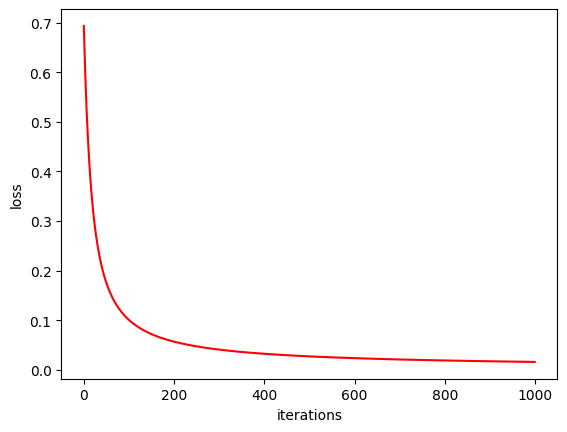

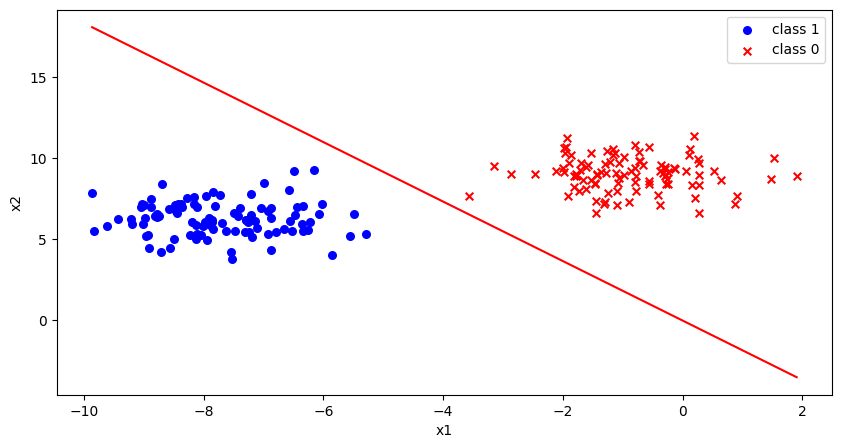

In [2]:
import matplotlib.pyplot as plt
import numpy as np


class LogisticRegession:
    #define sigmoid function
    def sigmoid(self, x):
        y_prob = 1.0 / (1.0 + np.exp(-x))
        return y_prob

    #define prediction function
    def predict_prob(self, x):
        y_prob = self.sigmoid(np.dot(x, self.w) + self.b)  # see Eq.(2.7)
        return y_prob

    #define prediction function
    def predict(self, X):
        inst_num = X.shape[0]
        probs = self.predict_prob(X)
        labels = np.zeros(inst_num)
        for i in range(inst_num):
            if probs[i] >= 0.5:
                labels[i] = 1
        return probs, labels

    #define loss function
    def loss_function(self, train_x, train_y):
        inst_num = train_x.shape[0]
        loss = 0.0
        for i in range(inst_num):
            z = np.dot(train_x[i, :], self.w) + self.b
            loss += -train_y[i] * z + np.log(1 + np.exp(z))  #see Eq.(2.10)
        loss = loss / inst_num
        return loss

    #define gradient calculation function
    def calculate_grad(self, train_x, train_y):
        inst_num = train_x.shape[0]  # data size
        probs = self.sigmoid(train_x.dot(self.w) + self.b)  # training prediction
        #Add code here to calculate grad of weights, see Eq.(2.11)
        # Add code here to calculate grad of bias, see Eq.(2.12)
        grad_w = (train_x.T).dot((probs - train_y)) / inst_num
        grad_b = np.sum((probs - train_y)) / inst_num
        return grad_w, grad_b

    # gradient descent algorithm
    def gradient_descent(self, train_x, train_y, learn_rate, max_iter, epsilon):
        loss_list = []
        for i in range(max_iter):
            loss_old = self.loss_function(train_x, train_y)
            loss_list.append(loss_old)
            grad_w, grad_b = self.calculate_grad(train_x, train_y)
            self.w = self.w - learn_rate * grad_w
            self.b = self.b - learn_rate * grad_b
            loss_new = self.loss_function(train_x, train_y)
            if abs(loss_new - loss_old) <= epsilon:
                break
        return loss_list

    # learning linear regression model
    def fit(self, train_x, train_y, learn_rate, max_iter, epsilon):
        feat_num = train_x.shape[1]  # feature dimension
        self.w = np.zeros((feat_num, 1))  # initialize model parameters
        self.b = 0.0
        #learn model parameters using gradient descent algorithm
        loss_list = self.gradient_descent(train_x, train_y, learn_rate, max_iter, epsilon)
        self.training_visualization(loss_list)

    # learning process visualization
    def training_visualization(self, loss_list):
        plt.plot(loss_list, color="red")
        plt.xlabel("iterations")
        plt.ylabel("loss")
        plt.savefig("loss.png", bbox_inches="tight", dpi=400)
        plt.show()


#构造训练数据集
from sklearn.datasets import make_blobs
import pandas as pd

# make blob data
data, label = make_blobs(n_samples=200, n_features=2, centers=2)
train_x = np.array(data)
label = np.array(label)
train_label = label.reshape(-1, 1)
#设置参数
#train logistic regression model
LR = LogisticRegession()
LR.fit(data, train_label, 0.01, 1000, 0.00001)
#绘制模型的决策结界
#show decision boundary
df = pd.DataFrame()
df['x1'] = data[:, 0]
df['x2'] = data[:, 1]
df['class'] = label
positive = df[df["class"] == 1]
negative = df[df["class"] == 0]
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(positive["x1"], positive["x2"], s=30, c="b", marker="o", label="class 1")
ax.scatter(negative["x1"], negative["x2"], s=30, c="r", marker="x", label="class 0")
ax.legend()
ax.set_xlabel("x1")
ax.set_ylabel("x2")
orig_data = df.values
cols = orig_data.shape[1]
data_mat = orig_data[:, 0:cols - 1]
a = min(data_mat[:, 0])
b = max(data_mat[:, 0])
lin_x = np.linspace(a, b, 200)
lin_y = (-float(LR.b) - LR.w[0, 0] * lin_x) / LR.w[1, 0]
plt.plot(lin_x, lin_y, color="red")
plt.savefig("result.png", bbox_inches='tight', dpi=400)


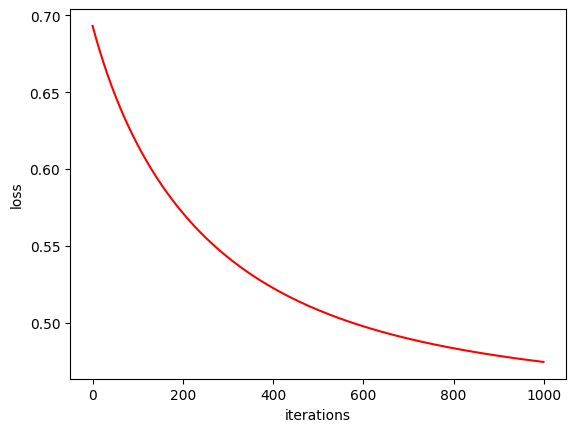

LR ACC:0.795
LR_SKL ACC:0.793


In [19]:
#import necessray libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from Logistic_Regression import LogisticRegession as LR
from sklearn.linear_model import LogisticRegression as LR_SKL


class LogisticRegession:
    #define sigmoid function
    def sigmoid(self, x):
        y_prob = 1.0 / (1.0 + np.exp(-x))
        return y_prob

    #define prediction function
    def predict_prob(self, x):
        y_prob = self.sigmoid(np.dot(x, self.w) + self.b)  # see Eq.(2.7)
        return y_prob

    #define prediction function
    def predict(self, X):
        inst_num = X.shape[0]
        probs = self.predict_prob(X)
        labels = np.zeros(inst_num)
        for i in range(inst_num):
            if probs[i] >= 0.5:
                labels[i] = 1
        return probs, labels

    #define loss function
    def loss_function(self, train_x, train_y):
        inst_num = train_x.shape[0]
        loss = 0.0
        for i in range(inst_num):
            z = np.dot(train_x[i, :], self.w) + self.b
            loss += -train_y[i] * z + np.log(1 + np.exp(z))  #see Eq.(2.10)
        loss = loss / inst_num
        return loss

    #define gradient calculation function
    def calculate_grad(self, train_x, train_y):
        inst_num = train_x.shape[0]  # data size
        probs = self.sigmoid(train_x.dot(self.w) + self.b)  # training prediction
        #Add code here to calculate grad of weights, see Eq.(2.11)
        # Add code here to calculate grad of bias, see Eq.(2.12)
        grad_w = (train_x.T).dot((probs - train_y)) / inst_num
        grad_b = np.sum((probs - train_y)) / inst_num
        return grad_w, grad_b

    # gradient descent algorithm
    def gradient_descent(self, train_x, train_y, learn_rate, max_iter, epsilon):
        loss_list = []
        for i in range(max_iter):
            loss_old = self.loss_function(train_x, train_y)
            loss_list.append(loss_old)
            grad_w, grad_b = self.calculate_grad(train_x, train_y)
            self.w = self.w - learn_rate * grad_w
            self.b = self.b - learn_rate * grad_b
            loss_new = self.loss_function(train_x, train_y)
            if abs(loss_new - loss_old) <= epsilon:
                break
        return loss_list

    # learning linear regression model
    def fit(self, train_x, train_y, learn_rate, max_iter, epsilon):
        feat_num = train_x.shape[1]  # feature dimension
        self.w = np.zeros((feat_num, 1))  # initialize model parameters
        self.b = 0.0
        #learn model parameters using gradient descent algorithm
        loss_list = self.gradient_descent(train_x, train_y, learn_rate, max_iter, epsilon)
        self.training_visualization(loss_list)

    # learning process visualization
    def training_visualization(self, loss_list):
        plt.plot(loss_list, color="red")
        plt.xlabel("iterations")
        plt.ylabel("loss")
        plt.savefig("loss.png", bbox_inches="tight", dpi=400)
        plt.show()


# load experiment data
f=open('Stock_Client_loss.csv',encoding='gbk')
data = pd.read_csv(f)
data_x = data[['账户资金（元）','最后一次交易距今时间（天）','上月交易佣金（元）','累计交易佣金（元）','本券商使用时长（年）']]
data_y = np.array(data["是否流失"])
# data normalization
scaler = StandardScaler()
data_x = scaler.fit_transform(data_x)
# divide data into train/test, 70% for train, 30% for test
X_train, X_test, Y_train, Y_test = train_test_split(data_x,
                                                    data_y,
                                                    test_size=0.3,
                                                    shuffle=True)
# set training parameters and define eval metric
learnrate = 0.01
maxiter = 1000
eps = 1e-5


def cal_acc(y_test, y_pred):
    acc = 0.0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            acc += 1.0
    return acc / len(y_test)


# build prediction model using LR
LR_model = LogisticRegession()
LR_model.fit(train_x=X_train, train_y=Y_train.reshape(-1, 1),
             learn_rate=learnrate, max_iter=maxiter, epsilon=eps)
_, Y_test_pred_LR = LR_model.predict(X_test)
acc = cal_acc(Y_test, Y_test_pred_LR)
print("LR ACC:%.3f" % (acc))
# build prediction model using LR_SKL
LR_SKL_model = LR_SKL()
LR_SKL_model.fit(X_train, Y_train)
Y_test_pred_LR_SKL = LR_SKL_model.predict(X_test)
acc = cal_acc(Y_test, Y_test_pred_LR_SKL)
print("LR_SKL ACC:%.3f" % (acc))

In [20]:
y_score=LR_SKL_model.predict_proba(X_test)[:, 1]

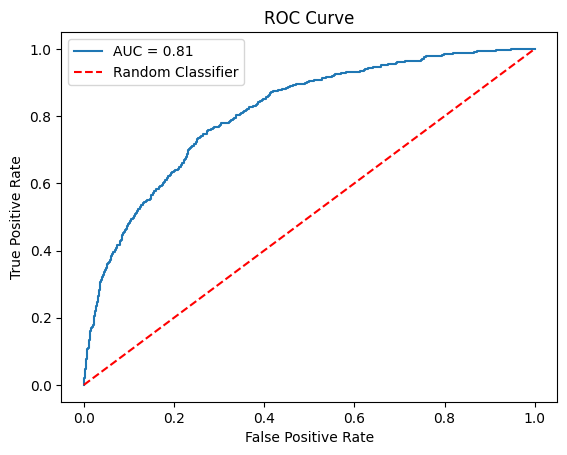

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_test, y_score)
auc_score = roc_auc_score(Y_test, y_score)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')  # 绘制ROC曲线，标注AUC的值
# 随即分类器没有分类能力，其FPR=TPR。随机分类器的性能通常表示为ROC曲线上的对角线
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  # 绘制随机分类器的ROC曲线
plt.xlabel('False Positive Rate')  # x轴标签为FPR
plt.ylabel('True Positive Rate')   # y轴标签为TPR
plt.title('ROC Curve')             # 设置标题
plt.legend()
plt.show()

In [7]:
data = pd.read_csv('Stock_Client_loss.csv', encoding='GBK')
print(data.columns)  # 打印出列名，确认是否包含'x1', 'x2', 'x3', 'x4', 'x5'


Index(['账户资金（元）', '最后一次交易距今时间（天）', '上月交易佣金（元）', '累计交易佣金（元）', '本券商使用时长（年）',
       '是否流失'],
      dtype='object')


# 多分类问题

In [24]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [32]:
class LogisticRegressionMultiClass:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # 初始化参数
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

        # 将标签转换为 one-hot 编码
        y_one_hot = self.one_hot(y, num_classes)

        # 梯度下降
        for _ in range(self.max_iter):
            model = np.dot(X, self.weights) + self.bias
            y_predicted = self.softmax(model)

            # 计算梯度
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y_one_hot))
            db = (1 / num_samples) * np.sum(y_predicted - y_one_hot, axis=0)

            # 更新参数
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_prob = self.softmax(model)
        return y_prob

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        y_predicted = self.softmax(model)
        return np.argmax(y_predicted, axis=1)

    @staticmethod
    def softmax(z):
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    @staticmethod
    def one_hot(y, num_classes):
        one_hot = np.zeros((len(y), num_classes))
        one_hot[np.arange(len(y)), y] = 1
        return one_hot


In [33]:
# 生成模拟数据
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=42)

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 创建并训练模型
model = LogisticRegressionMultiClass(learning_rate=0.01, max_iter=1000)
model.fit(X_train, y_train)

# 进行预测
predictions = model.predict(X_test)


In [28]:
predictions

array([1, 0, 1, 1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1,
       2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 0,
       2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1,
       2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 2])

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

# 计算准确率
acc = accuracy_score(y_test, predictions)
print(f"Accuracy: {acc}")

# 输出混淆矩阵
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)


Accuracy: 0.8566666666666667
Confusion Matrix:
 [[ 64  15   9]
 [ 10  86   1]
 [  3   5 107]]


In [35]:
y_score=model.predict_proba(X_test)

In [36]:
y_score

array([[4.15006235e-01, 5.69704861e-01, 1.52889047e-02],
       [5.18758974e-01, 4.48749493e-01, 3.24915331e-02],
       [4.11112040e-02, 9.58512587e-01, 3.76208642e-04],
       [2.11230811e-01, 7.60990326e-01, 2.77788626e-02],
       [3.34235337e-01, 1.21294288e-02, 6.53635234e-01],
       [2.91865225e-01, 1.87374974e-01, 5.20759801e-01],
       [7.92383595e-01, 1.26832524e-01, 8.07838812e-02],
       [7.55409807e-01, 1.66310627e-02, 2.27959131e-01],
       [7.00896927e-02, 2.71884150e-01, 6.58026157e-01],
       [2.15615619e-03, 8.87626199e-01, 1.10217645e-01],
       [6.14572625e-02, 8.46104659e-01, 9.24380788e-02],
       [5.09046203e-01, 4.68801412e-02, 4.44073656e-01],
       [6.29694670e-01, 3.35432762e-01, 3.48725680e-02],
       [2.86480273e-01, 6.54112384e-01, 5.94073428e-02],
       [3.01427487e-02, 9.26986770e-01, 4.28704815e-02],
       [1.25171305e-01, 3.23771939e-02, 8.42451501e-01],
       [3.40277877e-01, 6.25896220e-01, 3.38259032e-02],
       [3.48360646e-02, 9.34581

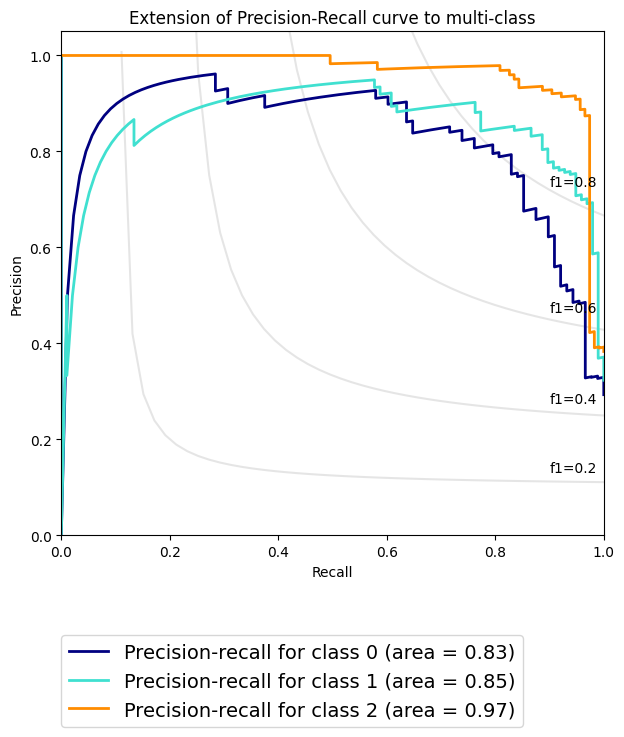

In [37]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# 假设 y_test 是真实标签，y_score 是模型预测的概率
# 将标签二值化
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# 为每个类别计算Precision-Recall曲线和平均精度
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# 绘制所有类别的曲线
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])
plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.show()


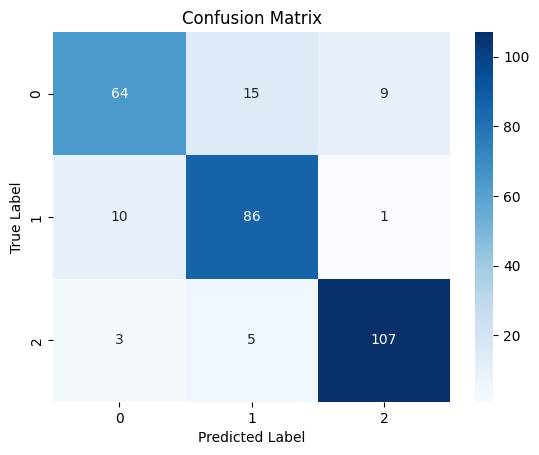

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# 计算混淆矩阵
cm = confusion_matrix(y_test, predictions)

# 绘制混淆矩阵
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
